In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
df = pd.read_csv("../data/Library_Usage.csv")
df.head()

/tmp/ipykernel_2984/639664574.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/Library_Usage.csv")


,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False
2,5,Staff,70,33,45 to 54 years,n4,Noe Valley,Jan,2023.0,z,Email,True,2011,False
3,5,Staff,3934,2140,NaN,o2,Ocean View,Jul,2023.0,z,Email,True,2003,False
4,5,Staff,1118,1035,NaN,o7,Ortega,Jul,2023.0,z,Email,True,2003,False


In welchem Jahr zwischen 2003 und 2023 gab es die meisten Neuanmeldungen?

In [44]:
sns.set()

In [45]:
df_registered = df['Year Patron Registered']

In [46]:
df_registered_freq = df['Year Patron Registered'].value_counts()
print(df_registered_freq)

Year Patron Registered
2022    52173
2019    44290
2003    41034
2021    32634
2020    32010
2017    29320
2018    28622
2023    26286
2016    21719
2015    20157
2014    15965
2013    13330
2012    12681
2011    12368
2009    11391
2010    11247
2008    10102
2007     6484
2006     5254
2005     4760
2004     4463
Name: count, dtype: int64


<Axes: xlabel='Year Patron Registered'>

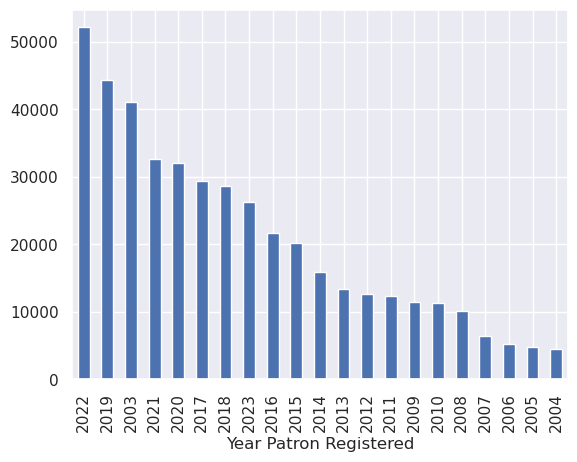

In [47]:
df["Year Patron Registered"].value_counts().plot(kind='bar')

Antwort: 2022 gab es die meisten Neuregistrierungen. 2004 die wenigsten.

Wie viele Ausleihen werden im Mittel pro Altersgruppe getätigt? Ist die Streuung zwischen den Gruppen gleich?

In [90]:
df_age_checkouts_year = df[['Age Range','Total Checkouts', 'Circulation Active Year']]

In [87]:
df_age_checkouts = df[['Age Range','Total Checkouts']]

In [89]:
df_age_checkouts.head()

,Age Range,Total Checkouts
0,NaN,53
1,NaN,480
2,45 to 54 years,70
3,NaN,3934
4,NaN,1118


/home/barbara/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


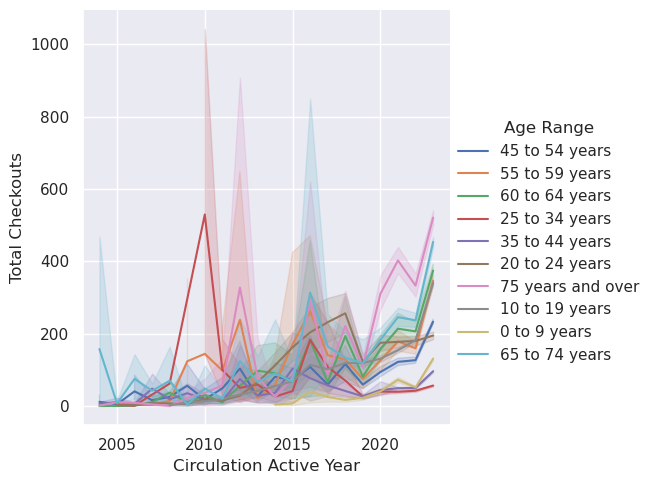

In [53]:
sns.relplot(data=df_age_checkouts_year, x='Circulation Active Year', y=df_age_checkouts_year['Total Checkouts'], hue='Age Range', kind='line') 

In [124]:
df_age_checkouts_mean = df_age_checkouts.groupby(['Age Range']).mean()

In [125]:
df_age_checkouts_mean

,Total Checkouts,mean_checkouts3
Age Range,,
0 to 9 years,67.223174,NaN
10 to 19 years,202.906367,NaN
20 to 24 years,164.703912,NaN
25 to 34 years,47.712471,NaN
35 to 44 years,74.883283,NaN
45 to 54 years,182.012956,NaN
55 to 59 years,264.290575,NaN
60 to 64 years,291.067577,NaN
65 to 74 years,360.513874,NaN


<Axes: xlabel='Age Range'>

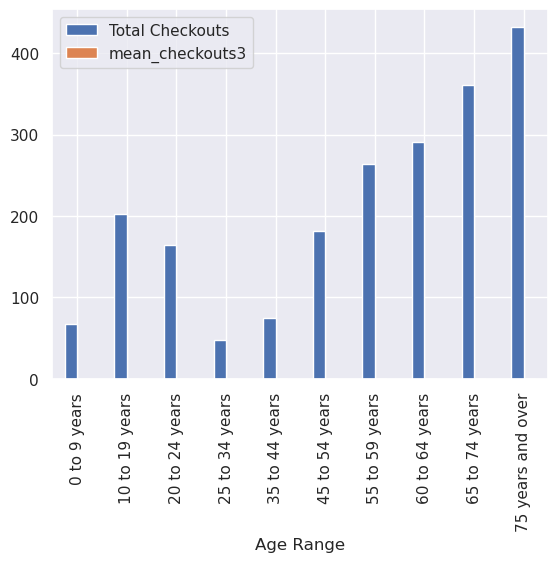

In [126]:
df_age_checkouts_mean.plot(kind='bar')

In [73]:
row_filter_45to54 = df['Age Range'] == '45 to 54 years'
row_filter_45to54 =  df.loc[row_filter_45to54]

In [72]:
row_filter_45to54['Total Checkouts'].mean() 

182.0129555661334

In [66]:
df_age_checkouts_year

,Age Range,Total Checkouts,Circulation Active Year,mean_checkouts,mean_checkouts2
0,NaN,53,2023.0,160.294843,160.294843
1,NaN,480,2023.0,160.294843,160.294843
2,45 to 54 years,70,2023.0,160.294843,160.294843
3,NaN,3934,2023.0,160.294843,160.294843
4,NaN,1118,2023.0,160.294843,160.294843
...,...,...,...,...,...
436285,35 to 44 years,2,2022.0,160.294843,160.294843
436286,10 to 19 years,3,2015.0,160.294843,160.294843
436287,60 to 64 years,6,2022.0,160.294843,160.294843
436288,35 to 44 years,4,2020.0,160.294843,160.294843


In [55]:
row_filter_45to54['Total Checkouts'].mean()

182.0129555661334